In [1]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder \
        .master('local[*]') \
        .appName('Basics') \
        .getOrCreate()

print(spark.version)

3.5.4


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from catboost import CatBoostClassifier, CatBoostRegressor

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Assign home directory
home_dir = 'C:/Users/gyalm/OneDrive/Desktop/btl_model'

In [159]:
# Define functions
# Import additional packages
import datetime
import csv
import yaml
import io
import dill as pickle
import os

def get_datetime():
    """Returns datetime for filename use.

    :return: datetime
    :rtype: string
    """
    stamp = datetime.datetime.now()
    datetime_name = f"{stamp.year:04}{stamp.month:02}{stamp.day:02}_{stamp.hour:02}{stamp.minute:02}"
    print(datetime_name)
    return datetime_name

print('Functions ready!')

Functions ready!


In [3]:
import kagglehub

# Download latest dataset
path = kagglehub.dataset_download("nadyinky/sephora-products-and-skincare-reviews")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\gyalm\.cache\kagglehub\datasets\nadyinky\sephora-products-and-skincare-reviews\versions\2


In [163]:
import glob
import zipfile

# Define dataset path
path = "C:/Users/gyalm/.cache/kagglehub/datasets/nadyinky/sephora-products-and-skincare-reviews/versions/2"

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Print all available CSV files
print("CSV Files Found:")
for file in csv_files:
    print("-", os.path.basename(file))

# Read each CSV file and store in dictionary
dfs = {os.path.basename(file): pd.read_csv(file) for file in csv_files}

# Separate CSV files into their own DataFrames
product_df = dfs.get("product_info.csv")
reviews_1_df = dfs.get("reviews_0-250.csv")
reviews_2_df = dfs.get("reviews_250-500.csv")
reviews_3_df = dfs.get("reviews_500-750.csv")
reviews_4_df = dfs.get("reviews_750-1250.csv")
reviews_5_df = dfs.get("reviews_1250-end.csv")

# Define output path for product DataFrame
product_output_path = f"{home_dir}/data/product_df.csv"

# Save product DataFrame as a CSV file
product_df.to_csv(product_output_path, index=False)

# Define output path for reviews compressed file
reviews_1_output_path = f"{home_dir}/data/reviews_1_df.csv"
reviews_2_output_path = f"{home_dir}/data/reviews_2_df.csv"
reviews_3_output_path = f"{home_dir}/data/reviews_3_df.csv"
reviews_4_output_path = f"{home_dir}/data/reviews_4_df.csv"
reviews_5_output_path = f"{home_dir}/data/reviews_5_df.csv"

# Save the reviews DataFrame as a CSV file
reviews_1_df.to_csv(reviews_1_output_path, index=False)
reviews_2_df.to_csv(reviews_2_output_path, index=False)
reviews_3_df.to_csv(reviews_3_output_path, index=False)
reviews_4_df.to_csv(reviews_4_output_path, index=False)
reviews_5_df.to_csv(reviews_5_output_path, index=False)

CSV Files Found:
- product_info.csv
- reviews_0-250.csv
- reviews_1250-end.csv
- reviews_250-500.csv
- reviews_500-750.csv
- reviews_750-1250.csv


C:\Users\gyalm\AppData\Local\Temp\ipykernel_13788\3607951139.py:16: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = {os.path.basename(file): pd.read_csv(file) for file in csv_files}
C:\Users\gyalm\AppData\Local\Temp\ipykernel_13788\3607951139.py:16: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = {os.path.basename(file): pd.read_csv(file) for file in csv_files}
C:\Users\gyalm\AppData\Local\Temp\ipykernel_13788\3607951139.py:16: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = {os.path.basename(file): pd.read_csv(file) for file in csv_files}


In [4]:
product_df = spark.read.csv(f"{home_dir}/data/product_df.csv", inferSchema=True, header=True)
product_df.show(10)
product_df.createOrReplaceTempView("product_df")

+----------+--------------------+--------+----------+-----------+------+-------+---------------+--------------------+--------------------+--------------+--------------------+---------+---------------+--------------+---------------+---+-----------+------------+-----------------+--------------------+----------------+------------------+--------------------+-----------+---------------+---------------+
|product_id|        product_name|brand_id|brand_name|loves_count|rating|reviews|           size|      variation_type|     variation_value|variation_desc|         ingredients|price_usd|value_price_usd|sale_price_usd|limited_edition|new|online_only|out_of_stock|sephora_exclusive|          highlights|primary_category|secondary_category|   tertiary_category|child_count|child_max_price|child_min_price|
+----------+--------------------+--------+----------+-----------+------+-------+---------------+--------------------+--------------------+--------------+--------------------+---------+--------------

In [5]:
reviews_1_df = spark.read.csv(f"{home_dir}/data/reviews_1_df.csv", inferSchema=True, header=True)
reviews_1_df.show(10)
reviews_1_df.createOrReplaceTempView("reviews_1_df")

reviews_2_df = spark.read.csv(f"{home_dir}/data/reviews_2_df.csv", inferSchema=True, header=True)
reviews_2_df.show(10)
reviews_2_df.createOrReplaceTempView("reviews_2_df")

reviews_3_df = spark.read.csv(f"{home_dir}/data/reviews_3_df.csv", inferSchema=True, header=True)
reviews_3_df.show(10)
reviews_3_df.createOrReplaceTempView("reviews_3_df")

reviews_4_df = spark.read.csv(f"{home_dir}/data/reviews_4_df.csv", inferSchema=True, header=True)
reviews_4_df.show(10)
reviews_4_df.createOrReplaceTempView("reviews_4_df")

reviews_5_df = spark.read.csv(f"{home_dir}/data/reviews_5_df.csv", inferSchema=True, header=True)
reviews_5_df.show(10)
reviews_5_df.createOrReplaceTempView("reviews_5_df")

+----------+-----------+------+--------------+-----------+--------------------+------------------------+------------------------+---------------+--------------------+--------------------+-----------+---------+-----------+----------+----------+--------------------+----------+---------+
|Unnamed: 0|  author_id|rating|is_recommended|helpfulness|total_feedback_count|total_neg_feedback_count|total_pos_feedback_count|submission_time|         review_text|        review_title|  skin_tone|eye_color|  skin_type|hair_color|product_id|        product_name|brand_name|price_usd|
+----------+-----------+------+--------------+-----------+--------------------+------------------------+------------------------+---------------+--------------------+--------------------+-----------+---------+-----------+----------+----------+--------------------+----------+---------+
|         0| 1741593524|     5|           1.0|        1.0|                   2|                       0|                       2|     2023-02-

In [6]:
# UNION ALL review tables into total_reviews_df
total_reviews_df = spark.sql("""
    SELECT * FROM reviews_1_df
    UNION ALL
    SELECT * FROM reviews_2_df
    UNION ALL
    SELECT * FROM reviews_3_df
    UNION ALL
    SELECT * FROM reviews_4_df
    UNION ALL
    SELECT * FROM reviews_5_df
""")
total_reviews_df.show(10)
total_reviews_df.createOrReplaceTempView("total_reviews_df")

+----------+-----------+------+--------------+-----------+--------------------+------------------------+------------------------+---------------+--------------------+--------------------+-----------+---------+-----------+----------+----------+--------------------+----------+---------+
|Unnamed: 0|  author_id|rating|is_recommended|helpfulness|total_feedback_count|total_neg_feedback_count|total_pos_feedback_count|submission_time|         review_text|        review_title|  skin_tone|eye_color|  skin_type|hair_color|product_id|        product_name|brand_name|price_usd|
+----------+-----------+------+--------------+-----------+--------------------+------------------------+------------------------+---------------+--------------------+--------------------+-----------+---------+-----------+----------+----------+--------------------+----------+---------+
|         0| 1741593524|     5|           1.0|        1.0|                   2|                       0|                       2|     2023-02-

In [7]:
# Calculate product_id sales revenue in 2022-2023
sales_revenue = spark.sql("""
SELECT 
    product_id,
    product_name,
    brand_name,
    SUM(price_usd) AS total_revenue
FROM total_reviews_df
WHERE YEAR(submission_time) BETWEEN 2020 AND 2023
GROUP BY product_id, product_name, brand_name
ORDER BY total_revenue DESC;
""")

sales_revenue.show()

+----------+--------------------+--------------------+-------------+
|product_id|        product_name|          brand_name|total_revenue|
+----------+--------------------+--------------------+-------------+
|   P375849|Facial Treatment ...|               SK-II|     482405.0|
|   P461933|Advanced Night Re...|        Estée Lauder|     470340.0|
|   P433520|Magic Cream Moist...|   Charlotte Tilbury|     282000.0|
|   P416341|Crème de la Mer M...|              La Mer|     281960.0|
|   P423688|Daily Microfolian...|         Dermalogica|     278525.0|
|   P461159|Estee Lauder Adva...|        Estée Lauder|     277380.0|
|   P479839|Revitalizing Supr...|        Estée Lauder|     272734.0|
|   P309308|Good Genes All-In...|        Sunday Riley|     267546.0|
|   P456213|GOOPGLOW Microder...|                goop|     266000.0|
|   P447212|    Hyaluronic Serum|   Dr. Barbara Sturm|     252160.0|
|   P460779|Skinlongevity Lon...|        bareMinerals|     242190.0|
|   P461949|The Concentrate S...| 

In [8]:
# Calculate product_id median sales revenue from 2022-2023 and compare to overall brand_name revenue

median_products = spark.sql("""
    WITH sales_revenue AS (
        SELECT 
            product_id,
            product_name,
            brand_name,
            SUM(review_count * price_usd) AS total_revenue
        FROM (
            SELECT 
                product_id,
                product_name, 
                brand_name,
                author_id, 
                COUNT(*) AS review_count, 
                price_usd
            FROM total_reviews_df
            WHERE YEAR(submission_time) BETWEEN 2022 AND 2023
            GROUP BY product_id, product_name, brand_name, author_id, price_usd
        ) subquery
        GROUP BY product_id, product_name, brand_name
    ),

    brand_revenue AS (
        SELECT 
            brand_name,
            SUM(total_revenue) AS brand_total_revenue
        FROM sales_revenue
        GROUP BY brand_name
    ),

    median_sales AS (
        SELECT percentile_approx(total_revenue, 0.5) AS median_revenue FROM sales_revenue
    )

    SELECT 
        sr.product_id, 
        sr.product_name, 
        sr.brand_name, 
        sr.total_revenue,
        (br.brand_total_revenue - sr.total_revenue) AS brand_total_revenue,
        ROUND((sr.total_revenue / br.brand_total_revenue) * 100, 2) AS percentage_difference
    FROM sales_revenue sr
    JOIN brand_revenue br ON sr.brand_name = br.brand_name
    JOIN median_sales ms ON sr.total_revenue = ms.median_revenue
""")

median_products.show()

+----------+--------------------+------------------+-------------+-------------------+---------------------+
|product_id|        product_name|        brand_name|total_revenue|brand_total_revenue|percentage_difference|
+----------+--------------------+------------------+-------------+-------------------+---------------------+
|   P442990|Clean Screen Mine...|REN Clean Skincare|        880.0|            75966.0|                 1.15|
|   P442713|FAB Skin Lab Reti...|  First Aid Beauty|        880.0|            71344.0|                 1.22|
|   P501323|Overnight Recover...|            Tatcha|        880.0|           255951.0|                 0.34|
|   P453929|Retinol Youth Ren...|             Murad|        880.0|           205419.0|                 0.43|
|   P467123|That Big Screen M...|        JLo Beauty|        880.0|            50974.0|                  1.7|
+----------+--------------------+------------------+-------------+-------------------+---------------------+



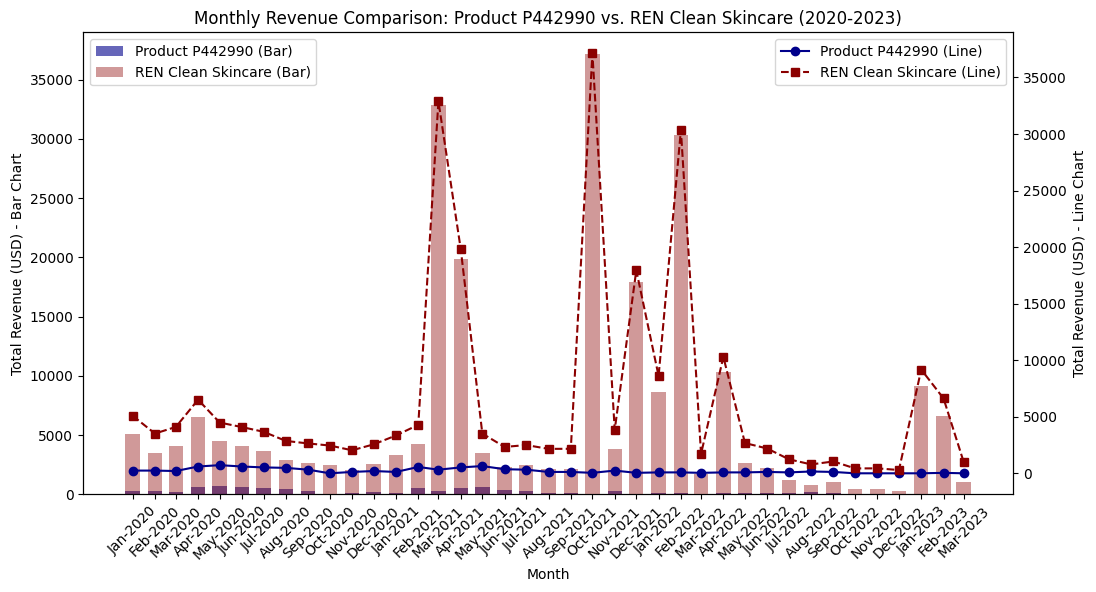

In [9]:
# Monthly Revenue Comparison: Product P442990 vs. REN Clean Skincare (2020-2023)

monthly_revenue_comparison = spark.sql("""
    WITH sales_revenue AS (
        SELECT  
            DATE_FORMAT(submission_time, 'yyyy-MM') AS month, 
            SUM(price_usd) AS total_revenue_product
        FROM total_reviews_df
        WHERE YEAR(submission_time) BETWEEN 2020 AND 2023
            AND product_id = 'P442990'
        GROUP BY DATE_FORMAT(submission_time, 'yyyy-MM')
    ),

    brand_revenue AS (
        SELECT 
            DATE_FORMAT(submission_time, 'yyyy-MM') AS month,
            SUM(review_count * price_usd) AS total_revenue_brand
        FROM (
            SELECT 
                brand_name,
                submission_time,
                COUNT(*) AS review_count, 
                price_usd
            FROM total_reviews_df
            WHERE YEAR(submission_time) BETWEEN 2020 AND 2023
                AND brand_name = 'REN Clean Skincare'
            GROUP BY brand_name, submission_time, price_usd
        ) subquery
        GROUP BY DATE_FORMAT(submission_time, 'yyyy-MM')
    )

    SELECT 
        COALESCE(sr.month, br.month) AS month,
        COALESCE(sr.total_revenue_product, 0) AS total_revenue_product,
        COALESCE(br.total_revenue_brand, 0) AS total_revenue_brand
    FROM sales_revenue sr
    FULL OUTER JOIN brand_revenue br ON sr.month = br.month
    ORDER BY month;
""").toPandas()

monthly_revenue_comparison["month"] = pd.to_datetime(monthly_revenue_comparison["month"])

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(monthly_revenue_comparison["month"], monthly_revenue_comparison["total_revenue_product"], 
        width=20, alpha=0.6, label="Product P442990 (Bar)", color="darkblue")
ax1.bar(monthly_revenue_comparison["month"], monthly_revenue_comparison["total_revenue_brand"], 
        width=20, alpha=0.4, label="REN Clean Skincare (Bar)", color="darkred")

ax2 = ax1.twinx()
ax2.plot(monthly_revenue_comparison["month"], monthly_revenue_comparison["total_revenue_product"], 
         marker="o", linestyle="-", label="Product P442990 (Line)", color="darkblue")
ax2.plot(monthly_revenue_comparison["month"], monthly_revenue_comparison["total_revenue_brand"], 
         marker="s", linestyle="--", label="REN Clean Skincare (Line)", color="darkred")

ax1.set_xlabel("Month")
ax1.set_ylabel("Total Revenue (USD) - Bar Chart", color="black")
ax2.set_ylabel("Total Revenue (USD) - Line Chart", color="black")

ax1.set_title("Monthly Revenue Comparison: Product P442990 vs. REN Clean Skincare (2020-2023)")
ax1.set_xticks(monthly_revenue_comparison["month"])
ax1.set_xticklabels(monthly_revenue_comparison["month"].dt.strftime('%b-%Y'), rotation=45)

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

In [79]:
# Complementary product_id and brand_name bought by same author_id that bought Product P442990

complementary_products = spark.sql("""
WITH target_customers AS (
    SELECT DISTINCT author_id
    FROM total_reviews_df
    WHERE product_id = 'P442990'
),
complementary_purchases AS (
    SELECT DISTINCT tr.author_id, tr.product_id, tr.product_name, tr.brand_name
    FROM total_reviews_df tr
    JOIN target_customers tc ON tr.author_id = tc.author_id
    WHERE tr.product_id != 'P442990'
)
SELECT 
    product_id, 
    product_name,
    brand_name, 
    COUNT(*) AS purchase_count
FROM complementary_purchases
GROUP BY product_id, product_name, brand_name
ORDER BY purchase_count DESC;
""")

complementary_products.createOrReplaceTempView("complementary_products")
complementary_products.show()

+----------+--------------------+-------------------+--------------+
|product_id|        product_name|         brand_name|purchase_count|
+----------+--------------------+-------------------+--------------+
|   P420652|Lip Sleeping Mask...|            LANEIGE|            23|
|   P417238|Green Clean Makeu...|            Farmacy|            16|
|   P450271|Green Clean Makeu...|            Farmacy|            16|
|   P470255|Mini Unseen Sunsc...|         Supergoop!|            13|
|   P454380|Unseen Sunscreen ...|         Supergoop!|            13|
|   P427417|Niacinamide 10% +...|       The Ordinary|            13|
|   P427421|Protini Polypepti...|     Drunk Elephant|            12|
|   P428095|Ready Steady Glow...| REN Clean Skincare|            12|
|   P465368|Mini Ready Steady...| REN Clean Skincare|            12|
|   P419221|Umbra Tinte Physi...|     Drunk Elephant|            12|
|   P456398|Ultimate Sun Prot...|           Shiseido|            11|
|   P394639|The True Cream Aq...| 

In [12]:
# List ingredients from Product P442990

ingredients = spark.sql("""
SELECT 
    ingredients
FROM product_df
WHERE product_id = 'P442990';
""")

ingredients.show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|ing

### **Product P442990 Key Ingredients and Their Effects in Cold Months (January-April)**  

1. **Aqua (Water)** – The primary solvent in the formulation, providing a base for other ingredients to dissolve and ensuring hydration.  

2. **Zinc Oxide** – A mineral UV filter with anti-inflammatory properties, helping to protect and soothe winter-stressed skin while offering sun protection against winter sun exposure.  

3. **Caprylic/Capric Triglyceride** – Derived from coconut oil, this lightweight emollient forms a protective layer on the skin, preventing moisture loss in cold and dry weather.  

4. **Aloe Barbadensis (Aloe Vera) Leaf Juice** – A natural hydrator that soothes irritation, reduces redness, and provides deep moisture, beneficial for winter-induced dryness.  

5. **Glycerin** – A powerful humectant that pulls moisture into the skin, helping to prevent dehydration caused by cold air and indoor heating.  

6. **Caprylyl Caprylate/Caprate** – A skin-conditioning agent that improves moisture retention and smoothens the skin’s surface.  

7. **Propanediol** – A humectant that enhances hydration and increases the penetration of other beneficial ingredients.  

8. **Arachidyl Alcohol** – A fatty alcohol that acts as an emollient, providing a rich and creamy texture to formulations and helping maintain skin hydration.  

9. **Cetearyl Alcohol** – A non-drying fatty alcohol that stabilizes emulsions and provides skin-softening benefits, essential in combating winter roughness.  

10. **Coco-Glucoside** – A mild surfactant derived from coconut, offering gentle cleansing without stripping the skin’s natural moisture.  

11. **Oryza Sativa (Rice) Starch** – Absorbs excess oil while providing a soft, velvety texture to the skin, ensuring comfort in winter formulations.  

12. **Pongamia Glabra (Karanja) Seed Oil** – Known for its UV-protective and antibacterial properties, it helps defend the skin against environmental stressors in cold months.  

13. **Microcrystalline Cellulose** – Acts as a texture enhancer, providing a smooth feel while absorbing excess oil.  

14. **Behenyl Alcohol** – A fatty alcohol that adds conditioning properties, keeping the skin soft and hydrated in cold weather.  

15. **Phenoxyethanol** – A preservative that prevents microbial growth, ensuring the product’s stability across different temperatures.  

16. **Arachidyl Glucoside** – Works as an emulsifier to maintain product consistency and stability during seasonal changes.  

17. **Isostearic Acid** – Helps emulsify and stabilize formulations while enhancing the spreadability of products.  

18. **Lecithin** – A phospholipid that supports moisture retention, reinforcing the skin barrier against winter dryness.  

19. **Polyglyceryl-3 Polyricinoleate** – A plant-derived emulsifier that enhances the stability of water and oil components.  

20. **Polyhydroxystearic Acid** – Works as a dispersing agent for mineral ingredients like Zinc Oxide, ensuring even application and protection against winter sun damage.  

21. **Passiflora Edulis (Passionfruit) Fruit Extract** – Rich in antioxidants, it helps protect against free radicals while providing nourishment for winter-exposed skin.  

22. **Ethylhexylglycerin** – A skin-conditioning agent that enhances hydration while boosting the effectiveness of preservatives.  

23. **Glyceryl Oleate** – An emulsifier that helps restore the skin’s natural lipids, preventing winter dryness.  

24. **Vaccinium Macrocarpon (Cranberry) Seed Oil** – High in antioxidants and omega fatty acids, it strengthens the skin’s barrier and protects against harsh winter elements.  

25. **Xanthan Gum** – A thickening agent that improves product texture and moisture retention.  

26. **Cellulose Gum** – Provides texture enhancement and hydration benefits.  

27. **Sodium Chloride** – Acts as a stabilizer, maintaining the product’s consistency across different temperatures.  

28. **Hippophae Rhamnoides (Sea Buckthorn) Oil** – Rich in essential fatty acids and vitamins, it supports skin regeneration and combats winter-induced irritation.  

29. **Citrus Nobilis (Mandarin Orange) Peel Oil** – Offers antioxidant benefits while providing a refreshing natural fragrance.  

30. **Anthemis Nobilis (Chamomile) Flower Oil** – Known for its anti-inflammatory and soothing effects, it helps calm winter skin sensitivity.  

31. **Cinnamomum Camphora Linalloliferum (Ho Wood) Leaf Oil** – Provides antibacterial properties while maintaining hydration.  

32. **Pelargonium Graveolens (Geranium) Flower Oil** – A balancing essential oil that soothes irritation and promotes hydration.  

33. **Glucose** – A humectant that enhances skin hydration by attracting moisture, ideal for combating winter dryness.  

34. **Parfum (Fragrance)** – Adds a pleasant scent, though some components may cause sensitivity in dry winter conditions.  

35. **Helianthus Annuus (Sunflower) Seed Oil** – A rich source of linoleic acid that reinforces the skin barrier, helping prevent moisture loss in cold weather.  

36. **Tocopherol (Vitamin E)** – A powerful antioxidant that protects against free radicals while nourishing and repairing dry, winter-stressed skin.  

37. **Rosmarinus Officinalis (Rosemary) Leaf Extract** – Has natural antioxidant and antimicrobial properties, promoting skin protection.  

38. **Hydrogenated Palm Glycerides Citrate** – A conditioning agent that enhances skin softness and moisture retention.  

39. **Citric Acid** – Helps balance pH levels and provides mild exfoliation, promoting a healthy skin barrier.  

40. **Sodium Hydroxide** – A pH adjuster that ensures the product remains gentle on the skin.  

41. **Citronellol, Geraniol, Limonene, Linalool** – Naturally occurring fragrance components with antioxidant properties but may cause sensitivity in dry winter skin.  

### **Effects in Cold Months**  
- **Hydration & Moisture Retention**: Ingredients like Glycerin, Aloe Vera, Caprylic/Capric Triglyceride, and Sunflower Seed Oil help maintain hydration.  
- **Barrier Protection & Repair**: Cranberry Seed Oil, Sea Buckthorn Oil, and Vitamin E support the skin barrier against winter-induced irritation.  
- **Anti-Inflammatory & Soothing Properties**: Chamomile Oil, Geranium Oil, and Aloe Vera reduce redness and irritation caused by cold weather.  
- **Antioxidant Defense**: Zinc Oxide, Passionfruit Extract, and Rosemary Leaf Extract help protect against environmental stressors.  
- **Potential Sensitivity**: Fragrance compounds like Citronellol, Limonene, and Geraniol may cause irritation in very dry or sensitive skin.  

### **Best Uses for Cold Months**  
- **Hydrating Creams & Moisturizers**: To maintain moisture levels and prevent dryness.  
- **Barrier-Repairing Oils & Serums**: Cranberry Seed Oil, Sea Buckthorn Oil, and Vitamin E help strengthen the skin.  
- **Soothing Treatments & Masks**: Aloe Vera, Chamomile, and Geranium Oil calm winter-related redness and irritation.  
- **Avoiding Harsh Exfoliation**: The skin is more vulnerable in cold months, so gentle care is necessary.  

### **Estimated Standard Concentrations**

#### **Base of the Formula**  
- **Aqua (Water)** – 50-80%  

#### **Active Ingredients**  
- **Zinc Oxide** – 5-25% (Used in sunscreens)  

#### **Emollients & Moisturizers**  
- **Caprylic/Capric Triglyceride** – 2-10%  
- **Caprylyl Caprylate/Caprate** – 1-3%  
- **Cetearyl Alcohol** – 2-5%  
- **Behenyl Alcohol** – 1-5%  
- **Glyceryl Oleate** – 0.5-2%  
- **Helianthus Annuus (Sunflower) Seed Oil** – 0.5-2%  
- **Hydrogenated Palm Glycerides Citrate** – 0.1-1%  

#### **Soothing & Hydrating Agents**  
- **Aloe Barbadensis Leaf Juice** – 1-5%  
- **Glycerin** – 2-10%  
- **Anthemis Nobilis (Chamomile) Flower Oil** – 0.1-1%  

#### **Emulsifiers & Stabilizers**  
- **Arachidyl Alcohol** – 0.5-3%  
- **Arachidyl Glucoside** – 0.5-2%  
- **Isostearic Acid** – 0.5-3%  
- **Lecithin** – 0.1-2%  
- **Polyglyceryl-3 Polyricinoleate** – 0.5-2%  
- **Polyhydroxystearic Acid** – 0.5-3%  

#### **Surfactants & Texture Enhancers**  
- **Coco-Glucoside** – 0.5-2%  
- **Microcrystalline Cellulose** – 0.5-3%  
- **Oryza Sativa Starch (Rice Starch)** – 0.5-2%  

#### **Antioxidants & UV Protection**  
- **Pongamia Glabra Seed Oil** – 1-3%  
- **Passiflora Edulis Fruit Extract** – 0.1-2%  
- **Vaccinium Macrocarpon (Cranberry) Seed Oil** – 0.1-1%  
- **Hippophae Rhamnoides (Sea Buckthorn) Oil** – 0.1-1%  
- **Tocopherol (Vitamin E)** – 0.1-1%  
- **Rosmarinus Officinalis (Rosemary) Leaf Extract** – 0.1-1%  

#### **Humectants & Solvents**  
- **Propanediol** – 1-5%  
- **Glucose** – 0.1-1%  

#### **Thickeners & Viscosity Adjusters**  
- **Xanthan Gum** – 0.1-1%  
- **Cellulose Gum** – 0.1-1%  
- **Sodium Chloride** – 0.1-2%  

#### **pH Adjusters**  
- **Citric Acid** – 0.1-1%  
- **Sodium Hydroxide** – 0.1-1%  

#### **Preservatives & Preservative Boosters**  
- **Phenoxyethanol** – 0.5-1%  
- **Ethylhexylglycerin** – 0.3-1%  

#### **Fragrances & Essential Oils**  
- **Citrus Nobilis (Mandarin Orange) Peel Oil** – 0.1-1%  
- **Cinnamomum Camphora Linalloliferum (Ho Wood) Leaf Oil** – 0.1-1%  
- **Pelargonium Graveolens Flower Oil** – 0.1-1%  
- **Parfum (Fragrance)** – 0.1-1%  
- **Citronellol, Geraniol, Limonene, Linalool** – 0.01-0.5% (Fragrance components)  

In [77]:
# Separating oz and mL values

separated_sizes = spark.sql('''
SELECT 
    product_id,
    product_name,
    brand_name,
    size,
    split(size, ' ')[0] AS oz_value,
    CASE 
        WHEN split(size, ' ')[2] = 'mL' THEN split(size, ' ')[1]
        WHEN split(size, ' ')[3] = 'mL' THEN split(size, ' ')[2]
        WHEN split(size, ' ')[4] = 'mL' THEN split(size, ' ')[3]
        WHEN split(size, ' ')[5] = 'mL' THEN split(size, ' ')[4]
        WHEN split(size, ' ')[6] = 'mL' THEN split(size, ' ')[5]
    END AS mL_value
FROM product_df
WHERE size RLIKE '(oz|mL)';
''')
separated_sizes.createOrReplaceTempView("separated_sizes")
separated_sizes.show(truncate=False)


+----------+--------------------------------------------------------+----------+-----------------------------------+--------+--------+
|product_id|product_name                                            |brand_name|size                               |oz_value|mL_value|
+----------+--------------------------------------------------------+----------+-----------------------------------+--------+--------+
|P473668   |La Habana Eau de Parfum                                 |19-69     |3.4 oz/ 100 mL                     |3.4     |100     |
|P473662   |Rainbow Bar Eau de Parfum                               |19-69     |3.4 oz/ 100 mL                     |3.4     |100     |
|P473660   |Kasbah Eau de Parfum                                    |19-69     |3.4 oz/ 100 mL                     |3.4     |100     |
|P473658   |Purple Haze Eau de Parfum                               |19-69     |3.4 oz/ 100 mL                     |3.4     |100     |
|P473661   |Kasbah Eau de Parfum Travel Spray          

In [113]:
# Calculate concentration (size * standard_conc_percentage) of each ingredient in Product P442990

ingredient_concentrations = spark.sql("""
    SELECT * FROM VALUES
        ('Aqua (Water)', 0.65),
        ('Zinc Oxide', 0.15),
        ('Caprylic/Capric Triglyceride', 0.06),
        ('Aloe Barbadensis Leaf Juice', 0.03),
        ('Glycerin', 0.06),
        ('Caprylyl Caprylate/Caprate', 0.02),
        ('Propanediol', 0.03),
        ('Arachidyl Alcohol', 0.0175),
        ('Cetearyl Alcohol', 0.035),
        ('Coco-Glucoside', 0.015),
        ('Oryza Sativa Starch', 0.015),
        ('Pongamia Glabra Seed Oil', 0.02),
        ('Microcrystalline Cellulose', 0.0175),
        ('Behenyl Alcohol', 0.03),
        ('Phenoxyethanol', 0.0075),
        ('Arachidyl Glucoside', 0.0125),
        ('Isostearic Acid', 0.0175),
        ('Lecithin', 0.0105),
        ('Polyglyceryl-3 Polyricinoleate', 0.0125),
        ('Polyhydroxystearic Acid', 0.0175),
        ('Passiflora Edulis Fruit Extract', 0.0105),
        ('Ethylhexylglycerin', 0.0065),
        ('Glyceryl Oleate', 0.0125),
        ('Vaccinium Macrocarpon (Cranberry) Seed Oil', 0.0055),
        ('Xanthan Gum', 0.0055),
        ('Cellulose Gum', 0.0055),
        ('Sodium Chloride', 0.0105),
        ('Hippophae Rhamnoides Oil', 0.0055),
        ('Citrus Nobilis (Mandarin Orange) Peel Oil', 0.0055),
        ('Anthemis Nobilis Flower Oil', 0.0055),
        ('Cinnamomum Camphora Linalloliferum (Ho Wood) Leaf Oil', 0.0055),
        ('Pelargonium Graveolens Flower Oil', 0.0055),
        ('Glucose', 0.0055),
        ('Parfum* (Fragrance)', 0.0055),
        ('Helianthus Annuus (Sunflower) Seed Oil', 0.0125),
        ('Tocopherol', 0.0055),
        ('Rosmarinus Officinalis (Rosmary) Leaf Extract', 0.0055),
        ('Hydrogenated Palm Glycerides Citrate', 0.0055),
        ('Citric Acid', 0.0055),
        ('Sodium Hydroxide', 0.0055),
        ('Citronellol', 0.00255),
        ('Geraniol', 0.00255),
        ('Limonene', 0.00255),
        ('Linalool', 0.00255)
    AS ingredient(ingredient, standard_conc_percentage)
""")
ingredient_concentrations.createOrReplaceTempView("ingredient_concentrations")
ingredient_concentrations.show(10)

+--------------------+------------------------+
|          ingredient|standard_conc_percentage|
+--------------------+------------------------+
|        Aqua (Water)|                 0.65000|
|          Zinc Oxide|                 0.15000|
|Caprylic/Capric T...|                 0.06000|
|Aloe Barbadensis ...|                 0.03000|
|            Glycerin|                 0.06000|
|Caprylyl Caprylat...|                 0.02000|
|         Propanediol|                 0.03000|
|   Arachidyl Alcohol|                 0.01750|
|    Cetearyl Alcohol|                 0.03500|
|      Coco-Glucoside|                 0.01500|
+--------------------+------------------------+
only showing top 10 rows



In [114]:
size_converted = spark.sql("""
    SELECT product_id, product_name, brand_name, oz_value AS size_oz, mL_value AS size_mL
    FROM separated_sizes
""")
size_converted.createOrReplaceTempView("size_converted")
size_converted.show(5)

+----------+--------------------+----------+-------+-------+
|product_id|        product_name|brand_name|size_oz|size_mL|
+----------+--------------------+----------+-------+-------+
|   P473668|La Habana Eau de ...|     19-69|    3.4|    100|
|   P473662|Rainbow Bar Eau d...|     19-69|    3.4|    100|
|   P473660|Kasbah Eau de Parfum|     19-69|    3.4|    100|
|   P473658|Purple Haze Eau d...|     19-69|    3.4|    100|
|   P473661|Kasbah Eau de Par...|     19-69|   0.25|    7.5|
+----------+--------------------+----------+-------+-------+
only showing top 5 rows



In [115]:
product_ingredients = spark.sql("""
    SELECT 
        p.product_id,
        TRIM(p.ingredient) AS ingredient,
        s.size_oz,
        s.size_mL
    FROM (
        SELECT 
            product_id, 
            EXPLODE(SPLIT(ingredients, ', ')) AS ingredient
        FROM product_df
    ) p
    JOIN size_converted s ON p.product_id = s.product_id
""")
product_ingredients.createOrReplaceTempView("product_ingredients")
product_ingredients.show(5)

+----------+--------------------+-------+-------+
|product_id|          ingredient|size_oz|size_mL|
+----------+--------------------+-------+-------+
|   P473668|         Linalool.']|    3.4|    100|
|   P473668|Alpha-Isomethyl I...|    3.4|    100|
|   P473668|             Eugenol|    3.4|    100|
|   P473668|   Coumarin Limonene|    3.4|    100|
|   P473668|              Citral|    3.4|    100|
+----------+--------------------+-------+-------+
only showing top 5 rows



In [116]:
matching_products_conc = spark.sql("""
    SELECT 
        pi.product_id,
        SUM(COALESCE(ic.standard_conc_percentage, 0) * pi.size_oz) AS total_concentration
    FROM product_ingredients pi
    LEFT JOIN ingredient_concentrations ic
    ON TRIM(pi.ingredient) = TRIM(ic.ingredient)
    GROUP BY pi.product_id
""")

matching_products_conc.createOrReplaceTempView("matching_products_conc")
matching_products_conc.show(10)

+----------+-------------------+
|product_id|total_concentration|
+----------+-------------------+
|   P455325|            0.04185|
|   P505023|0.36749999999999994|
|   P474304| 0.6628179999999999|
|   P471226|             0.1328|
|   P126301|0.24889999999999998|
|   P500098|             0.6175|
|     P4489| 2.2633799999999997|
|   P427731|0.07300000000000001|
|   P464238|            0.35445|
|   P503693|0.12336999999999998|
+----------+-------------------+
only showing top 10 rows



In [117]:
min_max_matching_conc = spark.sql("""
    SELECT 
        MIN(total_concentration) AS min_concentration,
        MAX(total_concentration) AS max_concentration
    FROM matching_products_conc
""")

min_max_matching_conc.show()

+-----------------+-----------------+
|min_concentration|max_concentration|
+-----------------+-----------------+
|              0.0|             39.2|
+-----------------+-----------------+



In [120]:
median_matching_conc = spark.sql("""
    SELECT 
        PERCENTILE_APPROX(total_concentration, 0.5) AS median_concentration
    FROM matching_products_conc
""")

median_matching_conc.show()

+--------------------+
|median_concentration|
+--------------------+
|               0.075|
+--------------------+



In [143]:
# Target definition: 0 being product_id below median matched concentration (<= 0.075), and 1 being product_id above matched concentration(> 0.075)

target_definition = spark.sql("""
    SELECT 
        mpc.product_id,
        mpc.total_concentration,
        CASE 
            WHEN mpc.total_concentration <= 0.075 THEN 0
            ELSE 1
        END AS target,
        tr.author_id,
        tr.product_name,
        tr.brand_name,
        tr.submission_time,
        tr.rating
    FROM matching_products_conc mpc
    LEFT JOIN total_reviews_df tr 
    ON mpc.product_id = tr.product_id
""")

target_definition.createOrReplaceTempView("target_definition")
target_definition.show(10)


+----------+-------------------+------+-----------+--------------------+----------+---------------+------+
|product_id|total_concentration|target|  author_id|        product_name|brand_name|submission_time|rating|
+----------+-------------------+------+-----------+--------------------+----------+---------------+------+
|   P126301|0.24889999999999998|     1| 5798933243|Take The Day Off ...|  CLINIQUE|     2023-03-20|     5|
|   P126301|0.24889999999999998|     1|25526458589|Take The Day Off ...|  CLINIQUE|     2023-03-10|     5|
|   P126301|0.24889999999999998|     1|12958904843|Take The Day Off ...|  CLINIQUE|     2023-02-26|     1|
|   P126301|0.24889999999999998|     1| 1316510353|Take The Day Off ...|  CLINIQUE|     2023-02-26|     4|
|   P126301|0.24889999999999998|     1| 8389515459|Take The Day Off ...|  CLINIQUE|     2023-02-26|     5|
|   P126301|0.24889999999999998|     1| 2427406909|Take The Day Off ...|  CLINIQUE|     2023-02-25|     5|
|   P126301|0.24889999999999998|     

In [144]:
# Compute correlation matrix for total_concentration from matching_products_conc & target from target_definition
correlation_matrix = spark.sql("""
    SELECT 
        corr(mpc.total_concentration, td.target) AS correlation
    FROM matching_products_conc mpc
    JOIN target_definition td 
    ON mpc.product_id = td.product_id
""")
correlation_matrix.show()

+-------------------+
|        correlation|
+-------------------+
|0.28259025116318814|
+-------------------+



**Model Design:**

 Using CatBoostClassifier (CatBoostAI’s GBDT framework), this model will classify and predict customers to target values of 0 or 1, with 1 being higher than median matching ingredient concentrations with P442990 and 0 being lower than median matching ingredient concentrations with P442990, and look into the likelihood of purchasing products with a higher than median matching ingredient concentration. The median temperature was taken as the boundary for high and low ingredient concentration match of P442990.

In [146]:
# Target definition: 0 being product_id below median matched concentration (<= 0.075), and 1 being product_id above matched concentration(> 0.075)
pdf_sabt = target_definition.toPandas()
pdf_sabt.head()

,product_id,total_concentration,target,author_id,product_name,brand_name,submission_time,rating
0,P04546871,0.00000,0,None,None,None,None,None
1,P05048798,0.00518,0,None,None,None,None,None
2,P122774,0.03900,0,2485269199,All About Eyes Eye Cream,CLINIQUE,2023-02-25,1
3,P122774,0.03900,0,1324336586,All About Eyes Eye Cream,CLINIQUE,2022-12-31,3
4,P122774,0.03900,0,9418818951,All About Eyes Eye Cream,CLINIQUE,2022-12-29,1


In [147]:
# Check column names in data
pdf_sabt.columns

Index(['product_id', 'total_concentration', 'target', 'author_id',
       'product_name', 'brand_name', 'submission_time', 'rating'],
      dtype='object')

In [148]:
# Check summary statistics
pdf_sabt[['product_id', 'total_concentration', 'target', 'author_id',
       'product_name', 'brand_name', 'submission_time', 'rating']].describe().T

,count,mean,std,min,25%,50%,75%,max
total_concentration,977389.0,0.241703,0.506065,0.0,0.06275,0.151385,0.2856,39.2
target,982317.0,0.689904,0.462533,0.0,0.00000,1.000000,1.0000,1.0


In [149]:
pdf_sabt.groupby(['target'])[['total_concentration', 'rating']].describe().T

target                                 0              1
total_concentration count  304613.000000  672776.000000
                    mean        0.029171       0.337931
                    std         0.026689       0.584827
                    min         0.000000       0.075150
                    25%         0.000000       0.143500
                    50%         0.022270       0.226100
                    75%         0.055000       0.372000
                    max         0.075000      39.200000

In [150]:
data = pdf_sabt[['product_id', 'total_concentration', 'target', 'author_id',
       'product_name', 'brand_name', 'submission_time', 'rating']].copy()

In [151]:
# Separate target variable and features
from sklearn.model_selection import train_test_split

target_col = 'target'

X = data.loc[:, data.columns != target_col]
y = data.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]} samples')
print(f'Testing set size: {X_test.shape[0]} samples')

Training set size: 785853 samples
Testing set size: 196464 samples


In [152]:
X_train.head()

,product_id,total_concentration,author_id,product_name,brand_name,submission_time,rating
3950,P122900,0.283500,9295395115,Dramatically Different Moisturizing Gel,CLINIQUE,2017-09-03,4
335120,P411540,0.261800,9794052125,Cicapair Tiger Grass Color Correcting Treatmen...,Dr. Jart+,2021-03-02,5
557254,P505346,0.208848,6274544266,First Care Activating Serum 25th Anniversary L...,Sulwhasoo,2022-10-25,5
490297,P415771,0.186150,31759573925,The Essence Skincare Boosting Treatment,Tatcha,2021-09-08,4
111691,P440504,0.151875,5064074590,R + R Mask,Summer Fridays,2020-02-01,3


In [153]:
y_train.head()

3950      1
335120    1
557254    1
490297    1
111691    1
Name: target, dtype: int32

In [154]:
print(y_train.value_counts())
print(y_test.value_counts())

target
1    542260
0    243593
Name: count, dtype: int64
target
1    135444
0     61020
Name: count, dtype: int64


In [155]:
from catboost import CatBoostClassifier

X_train = X_train.astype(str)
X_test = X_test.astype(str)

cat_features = X_train.select_dtypes(include=['object']).columns.tolist()

model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=50, eval_metric='F1')

model.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9977056	test: 0.9981953	best: 0.9981953 (0)	total: 868ms	remaining: 7m 13s
50:	learn: 0.9990033	test: 0.9994687	best: 0.9994687 (1)	total: 15.4s	remaining: 2m 15s
100:	learn: 0.9990033	test: 0.9994687	best: 0.9994687 (1)	total: 25.2s	remaining: 1m 39s
150:	learn: 0.9990033	test: 0.9994687	best: 0.9994687 (1)	total: 34.4s	remaining: 1m 19s
200:	learn: 0.9990033	test: 0.9994687	best: 0.9994687 (1)	total: 43.1s	remaining: 1m 4s
250:	learn: 0.9990033	test: 0.9994687	best: 0.9994687 (1)	total: 51.6s	remaining: 51.2s
300:	learn: 0.9990033	test: 0.9994687	best: 0.9994687 (1)	total: 1m	remaining: 39.7s
350:	learn: 0.9990033	test: 0.9994687	best: 0.9994687 (1)	total: 1m 8s	remaining: 29.1s
400:	learn: 0.9990033	test: 0.9994687	best: 0.9994687 (1)	total: 1m 17s	remaining: 19s
450:	learn: 0.9990033	test: 0.9994687	best: 0.9994687 (1)	total: 1m 25s	remaining: 9.31s
499:	learn: 0.9990033	test: 0.9994687	best: 0.9994687 (1)	total: 1m 34s	remaining: 0us

bestTest = 0.9994686974
bestIterat

In [156]:
y_pred = model.predict(X_test)

print(f'Predictions: {y_pred[:50]}')

Predictions: [1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0
 0 1 1 0 1 1 1 0 0 1 1 1 1]


Accuracy: 0.9993
F1: 0.9995
Precision: 0.9989
Recall: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61020
           1       1.00      1.00      1.00    135444

    accuracy                           1.00    196464
   macro avg       1.00      1.00      1.00    196464
weighted avg       1.00      1.00      1.00    196464

[[ 60876    144]
 [     0 135444]]


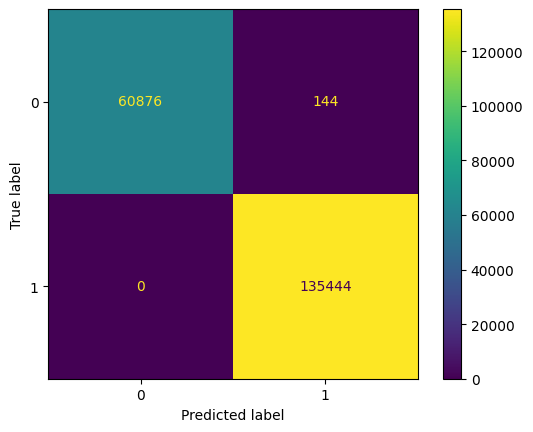

In [157]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'F1: {f1_score(y_test, y_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_pred):.4f}')
print(f'Recall: {recall_score(y_test, y_pred):.4f}')

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm_train = confusion_matrix(y_test, y_pred)
print(cm_train)

cmd_train = ConfusionMatrixDisplay(cm_train)
cmd_train.plot()

In [160]:
# Set model name

prefix_name="matched-conc_P442990_purchases"

model_name = f"btl_model_{get_datetime()}_{prefix_name}"
print(f"{model_name}")

20250320_2034
btl_model_20250320_2034_matched-conc_P442990_purchases


In [161]:
# Save model

import pickle

with open(f"{model_name}.pkl", "wb") as file:
    pickle.dump(model, file)

print(f"Model saved as {model_name}.pkl")

Model saved as btl_model_20250320_2034_matched-conc_P442990_purchases.pkl
